<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-signal" data-toc-modified-id="Load-signal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load signal</a></span></li><li><span><a href="#Compute-the-roughness" data-toc-modified-id="Compute-the-roughness-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compute the roughness</a></span></li><li><span><a href="#Compute-roughness-from-spectrum" data-toc-modified-id="Compute-roughness-from-spectrum-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compute roughness from spectrum</a></span></li></ul></div>


# How to compute acoustic Roughness according to Daniel and Weber method
This tutorial explains how to use MOSQITO to compute the acoustic roughness of a signal according to the methodology from Daniel and Weber. For more information on the implementation and validation of the metric, you can refer to the [documentation](../docs/roughness_dw.md).

The following commands are used to import the necessary functions.

In [1]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import numpy
import numpy as np
# Import plot function
import matplotlib.pyplot as plt
# Import multiple spectrum computation tool
from scipy.signal import stft
# Import mosqito functions
from mosqito.utils import load
from mosqito.sq_metrics import roughness_dw, roughness_dw_freq

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# To get inline plots (specific to Jupyter notebook)
%matplotlib notebook

## Load signal
For this tutorial, the test signal has been generated using the [signals_test_generation](../tests/sq_metrics/roughness/signals_test_generation.py) script. The signal is imported from a .wav file. The tutorial [Audio signal basic operations](./tuto_signal_basic_operations.ipynb) gives more information about the syntax of the import and the other supported file types. You can use any .wav file to perform the tutorial or you can download the [signal](../validations/sq_metrics/roughness_dw/input/Test_signal_fc1000_fmod70.wav) from MOSQITO that is used in the following.

According to the roughness definition, an amplitude-modulated tone with a carrier frequency of 1 kHz and a modulation frequency of 70 Hz at a level of 60 dB should correspond to a roughness of 1 asper for a modulation depth of 1. 

[Info] A calibration of 1 Pa/FS is considered
[Info] Signal resampled to 48 kHz to allow calculation.


<IPython.core.display.Javascript object>


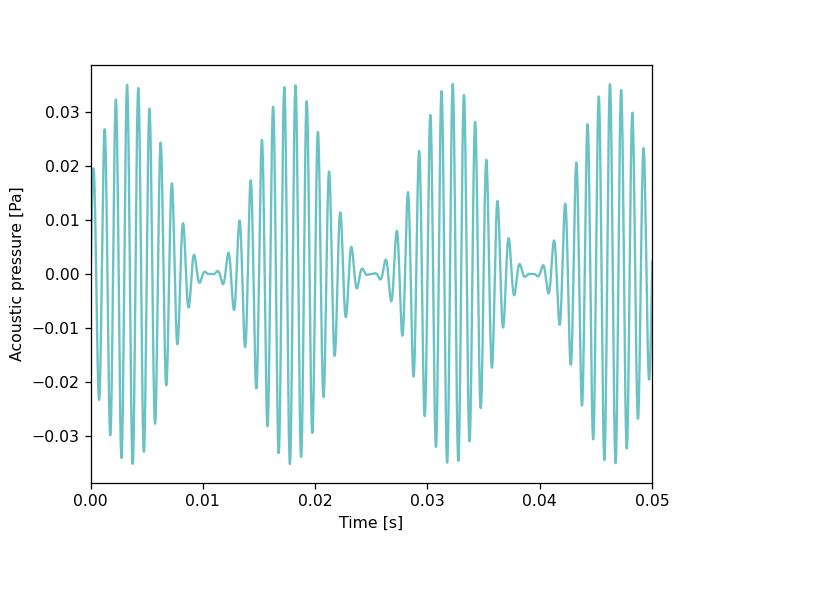

(0.0, 0.05)

In [2]:
# Define path to the .wav file
# To be replaced by your own path
path = "../validations/sq_metrics/roughness_dw/input/Test_signal_fc1000_fmod70.wav"
# load signal
sig, fs = load(path,)
# plot signal
t = np.linspace(0, (len(sig) - 1) / fs, len(sig))
plt.figure(1)
plt.plot(t, sig, color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel('Acoustic pressure [Pa]')
plt.xlim((0, 0.05))

## Compute the roughness
The acoustic Roughness is computed using the following command line. In addition to the signal (as ndarray) and the sampling frequency, the function takes 1 input argument "overlap" that indicates the overlapping coefficient for the time windows of 200ms (default is 0.5).

In [3]:
r, r_spec, bark, time = roughness_dw(sig, fs, overlap=0.5)

The function return the roughness of the signal versus time:

<IPython.core.display.Javascript object>


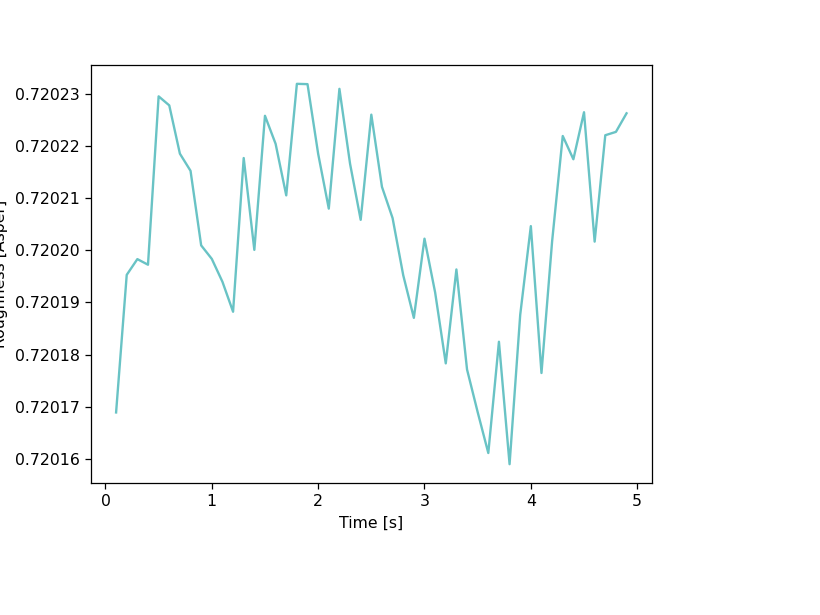

Text(0, 0.5, 'Roughness [Asper]')

In [4]:
plt.figure(2)
plt.plot(time, r, color=COLORS[0])
plt.xlabel("Time [s]")
plt.ylabel("Roughness [Asper]")

## Compute roughness from spectrum
The commands below shows how to compute the roughness from a frequency spectrum using the functions from MOSQITO. One should note that only stationary values can be computed from a frequency input. 

The input spectrum can be either 1D with size (Nfrequency) or 2D with size (fNrequency x Ntime). The corresponding time axis can be either the same for all the spectra, with size (Nfrequency) or different for each spectrum with size (Nfrequency x Ntime)

<IPython.core.display.Javascript object>


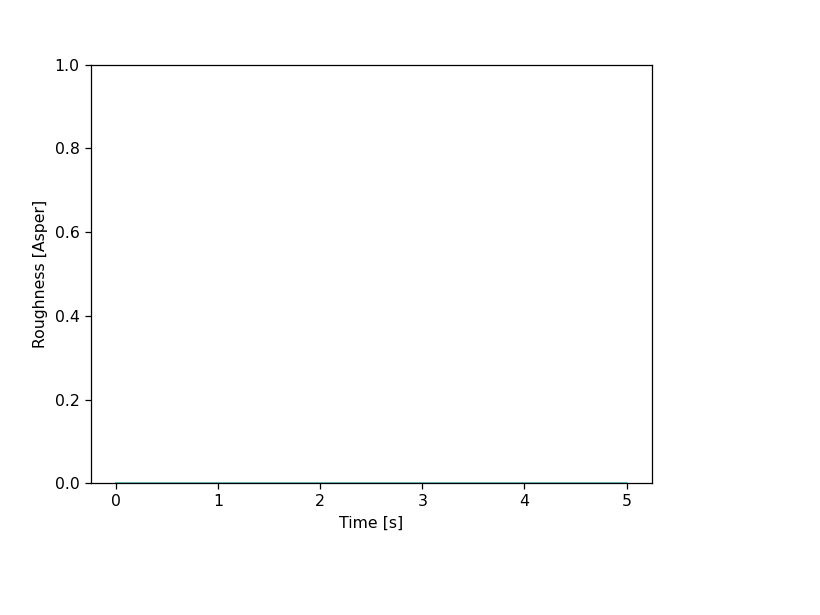

Text(0, 0.5, 'Roughness [Asper]')

In [5]:
# Compute multiple spectra along time
freqs, time, spectrum = stft(sig, fs=fs)

# Compute roughness
R, R_spec, bark = roughness_dw_freq(spectrum,freqs)

# Plot the results
plt.figure(6)
plt.plot(time, R, color=COLORS[0])
plt.ylim(0,1)
plt.xlabel("Time [s]")
plt.ylabel("Roughness [Asper]")

---

In [6]:
from datetime import date
print("Tutorial generation date:", date.today().strftime("%B %d, %Y"))

Tutorial generation date: March 30, 2022
